In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/Merged-Formatted-Indian-Names.csv')

In [3]:
data.head()

,name,gender
0,barjraj,m
1,ramdin verma,m
2,sharat chandran,m
3,birender mandal,m
4,amit,m


In [4]:

data.size

60970

In [5]:
data.columns

Index(['name', 'gender'], dtype='object')

In [6]:
data.dtypes

name      object
gender    object
dtype: object

In [7]:
data = data.dropna()

In [8]:
data = data.reset_index(drop=True)

In [9]:
data.size

60860

In [10]:
data[data['gender'] == 'm'].size

29642

In [11]:
data[data['gender'] == 'f'].size

30702

In [12]:
data[data['gender'] == 'u'].size

516

In [13]:
data_names = data

In [14]:
data_names.size

60860

## Unisex: 0; Female: 1; Male: 2

In [15]:
data_names['gender'].replace({'u': 0,'f': 1,'m': 2},inplace=True)

In [16]:
data_names['gender'].unique()

array([2, 1, 0], dtype=int64)

In [17]:
data_names.dtypes

name      object
gender     int64
dtype: object

In [18]:
name_data = data_names['name']
training_labels = data_names['gender']

In [19]:
name_data[name_data.isna()].size

0

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()
training_data = cv.fit_transform(name_data)

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(training_data, training_labels, random_state =42, test_size= 0.33)

In [23]:
print('Training Set: ', train_set.shape[0])
print('Test Set: ', test_set.shape[0])
print('Training Labels: ', train_labels.shape[0])
print('Test Labels: ', test_labels.shape[0])

Training Set:  20388
Test Set:  10042
Training Labels:  20388
Test Labels:  10042


In [54]:
train_dist = train_labels.value_counts()
test_dist = test_labels.value_counts()
all_disease = training_labels.unique()

gender_dict = {"Gender": [], "Training": [], "Testing": []}
for d in all_disease:
    gender_dict['Gender'].append(d)
    gender_dict['Training'].append(train_dist[d])
    gender_dict['Testing'].append(test_dist[d])

gender_dict_df = pd.DataFrame(gender_dict)
gender_dict_df
gender_dict_df.to_csv('./data/gender_distribution.csv', index=False)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
clf = MultinomialNB()
clf.fit(train_set, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Training accuracy

In [26]:
clf.score(train_set,train_labels)*100

96.39003335295271

## Test accuracy

In [27]:
clf.score(test_set,test_labels)*100

90.4600677155945

## Prediction on new data

In [28]:
sample_name = ["Rahul"]
vect = cv.transform(sample_name).toarray()

In [29]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
clf.predict(vect)

array([2], dtype=int64)

In [28]:
def predictGender(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    if clf.predict(vector)[0] == 0:
        print("Unisex")
    elif clf.predict(vector)[0] == 1:
        print("Female")
    elif clf.predict(vector)[0] == 2:
        print("Male")
    else:
        print("Unknown")

In [29]:
predictGender("Soumya Dey")

Male


In [30]:
predictGender("Arundhati Roy")

Male


In [33]:
predictGender("Meghnad Saha")

Female


In [36]:
predictGender("Deepika Padukon")

Female


In [37]:
predictGender("Manmohan Singh")

Male


In [38]:
predictGender("Virat Kohli")

Male


In [39]:
predictGender("Arjun Rampal")

Male


In [34]:
predictGender("Purnendu Paul")

Male


In [35]:
predictGender("Anik Ghoshal")

Female


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
predictions = clf.predict(test_set)

In [53]:
accuracy_score(test_labels, predictions)*100

90.4600677155945

In [44]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      0.96      0.91      5036
           2       0.95      0.87      0.90      4921

    accuracy                           0.90     10042
   macro avg       0.61      0.61      0.61     10042
weighted avg       0.90      0.90      0.90     10042



In [45]:
report = classification_report(test_labels, predictions, output_dict=True)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

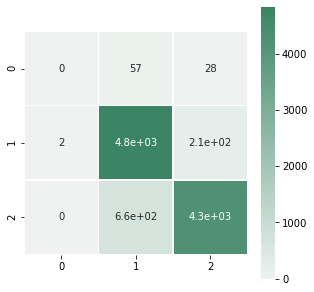

In [48]:
f, ax = plt.subplots(figsize = (5, 5))
c_matrix = confusion_matrix(test_labels, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)

In [51]:
from joblib import dump, load
dump(clf, './model/nb-classifier.joblib')

['./model/nb-classifier.joblib']